In [44]:
import pandas as pd
import os
import datetime as dt

#### Consolidating the data
There are 50 weeks worth of data contained in 50 separate csv files.  Our first step will be to combine them into a single file: 

In [20]:
sales_data = pd.DataFrame()

data_dir = os.getcwd() + "\\" + 'data'
os.chdir(data_dir)
for file in os.listdir():
    sales_data = sales_data.append(pd.read_csv(file))

sales_data.sale_time = pd.to_datetime(sales_data['sale_time'])


In [36]:
sales_data.shape

(204329, 2)

#### Cleaning the data
We now have all 204,329 sales records in a single file showing the time of sale and the gender of the person making the purchase.  

In [30]:
type(sales_data.sale_time.iloc[2])

str

The sale time variable is a string that gives us the day and the exact time the purchase was made.  We'll convert this data to datetime, then break out separate columns for: 
* The day
* The time of day
  * night (12am - 6am)
  * morning (6am - 12pm)
  * afternoon (12pm - 6pm)
  * evening (6pm - 12am)

In [37]:
sales_data.sale_time = pd.to_datetime(sales_data['sale_time'])
sales_data['date'] = sales_data.sale_time.dt.date
sales_data['time_of_day'] = pd.cut(sales_data.sale_time.dt.hour,
                                bins=[0, 6, 12, 18, 24],
                                labels=['night', 'morning', 'afternoon', 'evening'],
                                right=False,
                                include_lowest=True)

We can now do a quick visualization of daily sales volumes and see that there is a significant increase around May 2013.  This will be looked at in further detail once we move the analysis over to Tableau: 

<AxesSubplot:>

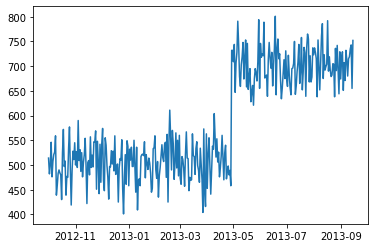

In [60]:
sales_data.date.value_counts().plot.line()

Now that we have the time of day sales were made, we can see the proportion of each time of day:

In [71]:
sales_data.time_of_day.value_counts(normalize=True)

afternoon    0.394134
morning      0.307690
evening      0.208585
night        0.089591
Name: time_of_day, dtype: float64

Evidently, most 23andMe sales were made in the afternoon (12pm - 6pm), while just 9% of sales were made at night (12am - 6am).  Now we will export our consolidated and cleaned dataset to a .csv and visualize it in Tableau: 

In [61]:
sales_data.to_csv('sales_data.csv')

The dashboard can be found here: 
https://public.tableau.com/app/profile/daniel.sutton/viz/23andMeSalesDataAnalysis/23andMeSales